In [15]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import os
os.path

<module 'ntpath' from 'C:\\Users\\86183\\AppData\\Roaming\\spsspro\\spsspro\\lib\\python\\lib\\ntpath.py'>

# 论文的写作思路
## 问题一：
- 1.1：分析这些玻璃文物纹饰、类型、颜色	、表面风化的关系；

1. 数据的清洗：空值处理、无效数据。。。

2. 卡方检验分析: 看这些变量他们两两之间的关系，之后按照卡方检验的结果来具体说明各个关系是怎么样的

变量X:{纹饰}；变量Y:{类型，颜色，表面风化}

先利用pearson卡方检验：https://www.spsspro.com/s/ae43d50fbbce4ee288266e169d06311f
再使用Yates校正卡方检验：https://www.spsspro.com/s/47df961030754e67ba387a77ad56167e


变量X:{类型}；变量Y:{颜色，表面风化}

Pearson：https://www.spsspro.com/s/0a2b3c88c7e646b49898e73277682948
Yates：https://www.spsspro.com/s/bd92dfdb3e6b44d9a87b58e115ab3266


变量X:{颜色}；变量Y:{表面风化}

Pearson: https://www.spsspro.com/s/ff53c4f1124840ed935e6f7cbc1fbdba
Ystes: https://www.spsspro.com/s/2e88c9dadc8f4f3ebfb35f18724bed67

写作过程：先写出Pearson卡方检验的相关计算公式，然后把各个图表贴上去；再写一下Pearson方法的一些弊端，为了改进，进而采用Ystes校正卡方，然后再说明公式，贴个图叭叭叭说点结论。


相关性分析：

变量X:{纹饰，类型，颜色，表面风化}；相关类型:{Spearman相关系数}
https://www.spsspro.com/s/919da963cc1f49f3a6c45ef0d56e443f

模型理论：可以摘抄一些内容上去简要的说明一下这个模型的数学理论
https://www.spsspro.com/help/correlation/#_8%E3%80%81%E6%A8%A1%E5%9E%8B%E7%90%86%E8%AE%BA


- 1.2 基于这些玻璃文物（高钾/铅钡）的类型，分析文物样品表面**有无风化**化学**成分含量**的统计规律；

1. 先做一个分类统计，统计有无风化下的类型均值：可以看到铅钡似乎更容易风化
https://www.spsspro.com/s/f243b38ab1174f309b52c04e544026d4

- 小插曲：利用SPSS得到各个化学物在各种类型的文物含量的均值，排列过后取含量前十的作为主要分析对象

2. 然后再使用分类统计，统计
分组变量： { 类型，表面风化 }； 汇总变量： { 二氧化硫(SO2)，氧化铜(CuO)，氧化钠(Na2O)，二氧化硅(SiO2)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化铝(Al2O3)，氧化钾(K2O)，氧化铅(PbO)，氧化钙(CaO) }
参数：
汇总类型： { 均值，中位数，标准差，最小值，最大值 }
https://www.spsspro.com/s/a58dab3686c649448f6db44aa0bd727f

- 1.3 根据风化点检测数据，预测其风化前的化学成分含量

因为本题提供的数据较少，可以利用

岭回归求解自变量多重共线性问题（一般VIF值大于10）的一种有偏估计回归方法；这里可以讲解一下岭回归的数学模型，点那个小问号去看。然后放出岭回归的模型训练效果：https://www.spsspro.com/s/4feba961b75a43b9b9eeaf6aba81a8f2
主要看决定系数R^2的大小差异来说明训练效果的好坏，比如岭回归的决定系数只有0.7几；但是XGBoost有0.9

由于数据存在非线性关系或复杂交互作用时我们可以采用如随机森林、XGBoost，作为模型构建的方法。这里我们使用XGBoost训练一个模型
https://www.spsspro.com/s/2412e87bf99e4f24b811ff89d5a04c5e

AI解释：https://chat.minimaxi.com/share/chat/63kq1Ok6?xx=P9p4G5ObxqZx





In [13]:
data=pd.read_excel('附件.xlsx',sheet_name='表单1') # 读入数据
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [ ]:
## XGBoost

import numpy
import pandas
from spsspro.algorithm import supervised_learning
#生成案例数据
data_x = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.choice([1, 2], size=100), name="C")
#XGBoost回归，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
print(result)

In [ ]:
## 岭回归

import numpy
import pandas
from spsspro.algorithm import statistical_model_analysis
#生成案例数据
data_x1 = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.random(size=100), name="Y")
#岭回归，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = statistical_model_analysis.ridge_regression(y=data_y, x1=data_x1)
print(result)

# 问题二

- 数据处理流程

将原始数据集分成风化/未风化 -> 对两种状态下的数据集过采样（smote） -> 对过采样后的数据集做归一化处理 -> 利用梯度提升树分类{类型} -> 导出训练分类结果 -> 将分类结果按照类型划分训练集 -> k-means聚类分析亚类（手肘法则）


- 写作思路




## k-means

# 第一层: 分化状态下的类型分类

风化状态下第一层的聚类结果分析

聚类分析结果显示，类别1（n=32）与类别2（n=40）在多数化学成分上存在显著差异（p<0.05）。

类别2以高**二氧化硅含量（90.64±9.117）为特征**，显著高于类别1（29.823±14.157，F=486.818，p=0.000），

而类别1在铅、钡、锶等重金属氧化物上表现突出：**氧化铅（39.708±13.581 vs 1.418±4.346，F=282.677）、氧化钡（11.164±9.148 vs 0.507±1.741，F=52.106）和氧化锶（0.384±0.254 vs 0.022±0.071，F=74.023）的组间差异均达1%显著性水平**。

五氧化二磷（4.629±4.164 vs 0.335±0.213，F=42.549）与氧化钙（2.412±1.674 vs 1.058±0.49，F=23.723）在类别1中显著更高，而氧化钾则呈现反向趋势（0.133±0.225 vs 0.461±0.34，F=21.978）。氧化钠（p=0.045）、氧化铁（p=0.019）和二氧化硫（p=0.070）虽显示差异但效应较弱，其中二氧化硫仅在10%水平显著。氧化铝（p=0.576）和氧化铜（p=0.248）等未通过显著性检验，表明这些成分对聚类区分贡献有限。
标准差数据反映类别1在重金属指标上离散度更大（如氧化铅标准差达13.581），暗示其样本异质性可能高于类别2。所有显著性结果均通过方差齐性检验（F值范围4.153-486.818），支持聚类结构的化学特征可分性。

2.1 : 分析高钾玻璃和铅钡玻璃的分类规律

- 1. 数据处理：空值处理、过采样

- 2. 通过SPSSPRO对数据集进行梯度提升树（GBDT）分类、决策树分类

得到结果如下：https://www.spsspro.com/s/ffa767c3770a4a9889db7dd3cac03f83

决策树：https://www.spsspro.com/s/de64c0402719472480a43f07d9d748a1

发现氧化铅有很强的特征重要性，几乎可以用这个化学物划分高钾玻璃和铅钡玻璃。通过决策树可以得出

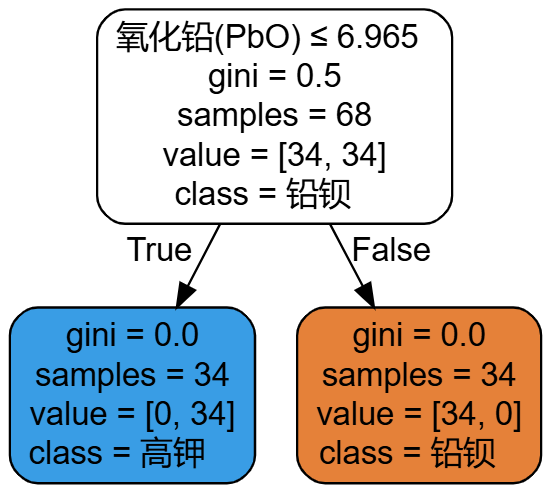

当氧化铅小于等于 6.965的时候划分到高钾玻璃这一类


## 梯度提升树 - 第二层划分使用的方法


风化
https://www.spsspro.com/s/34a8ec5cca2f4c6c99e7743ec9e41247


- 特征重要性
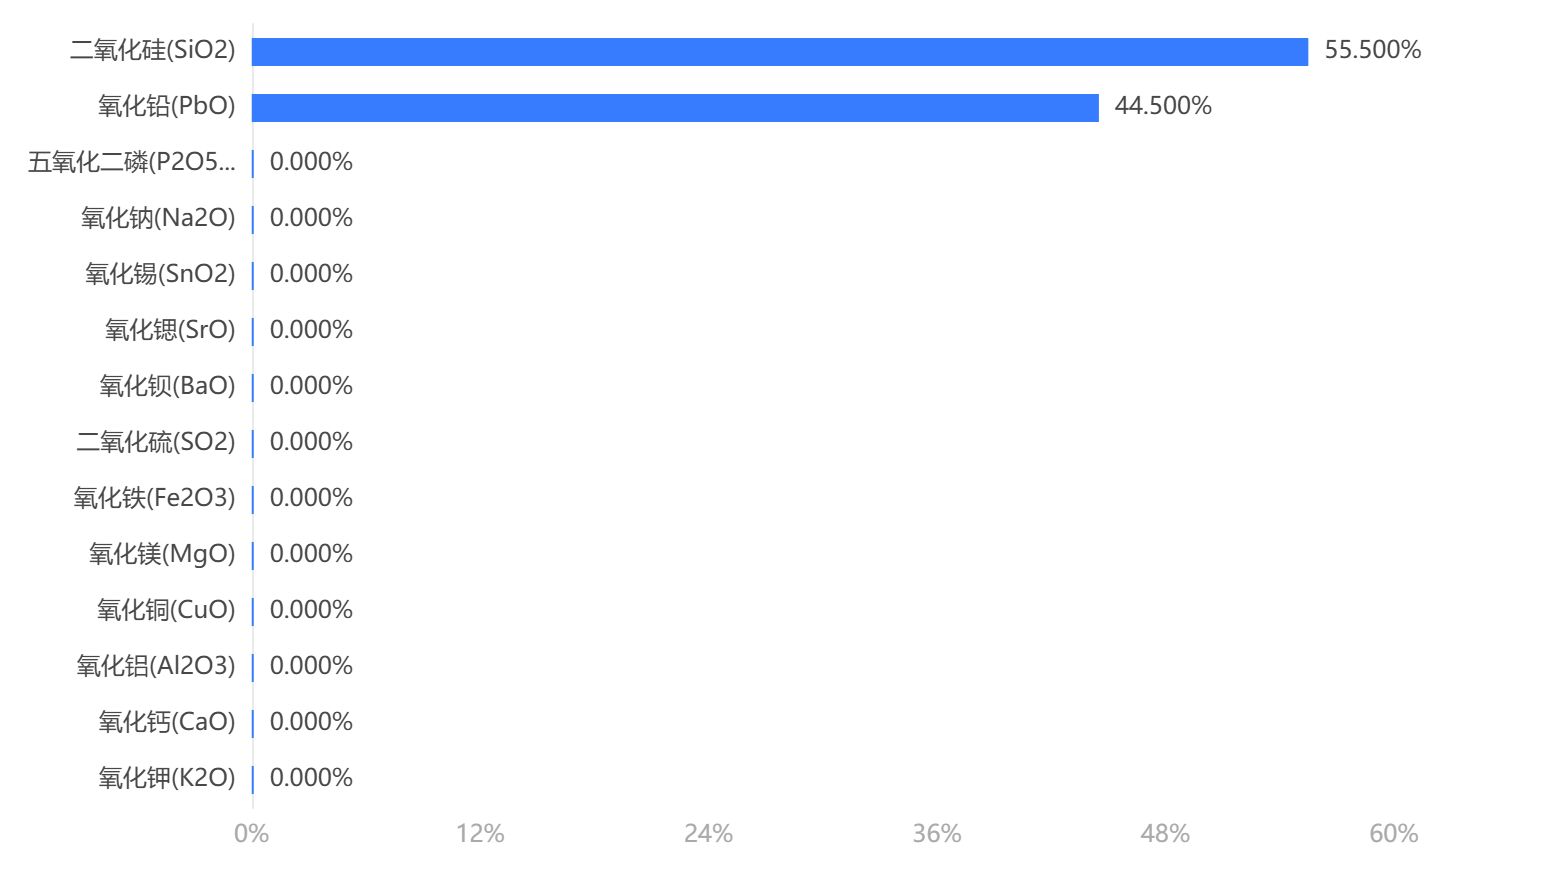

未风化
https://www.spsspro.com/s/765f08e09d22404da2be06fdbe785237

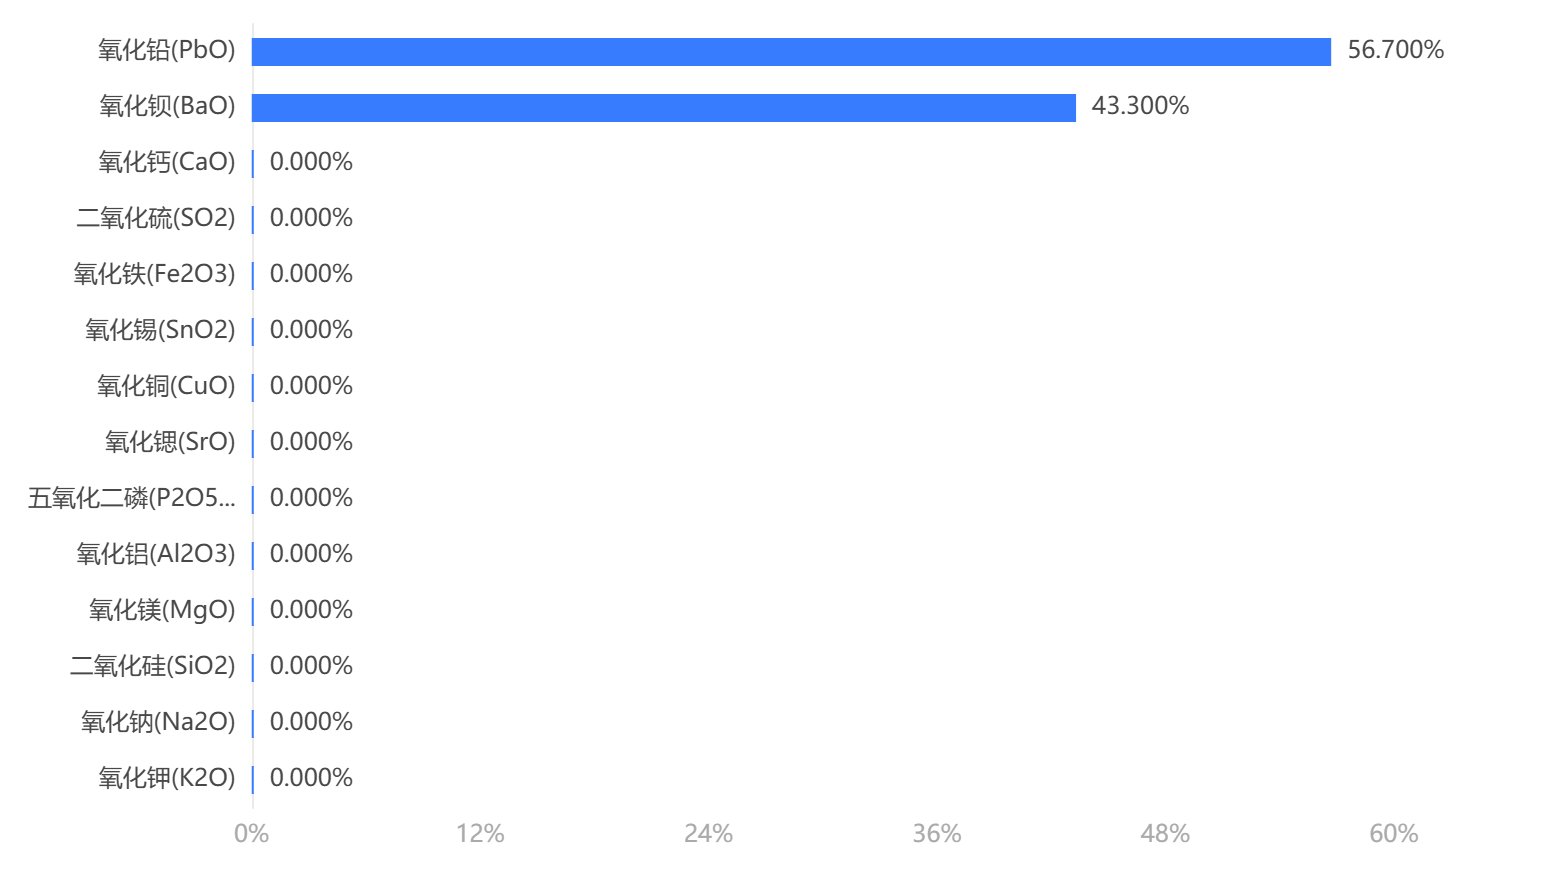


算法：
梯度提升树(GBDT)分类

变量：
变量X： { 五氧化二磷(P2O5)，氧化钠(Na2O)，氧化锡(SnO2)，氧化锶(SrO)，氧化钡(BaO)，二氧化硫(SO2)，氧化铅(PbO)，氧化铁(Fe2O3)，二氧化硅(SiO2)，氧化镁(MgO)，氧化铜(CuO)，氧化铝(Al2O3)，氧化钙(CaO)，氧化钾(K2O) }； 变量Y： { 类型 }

- 得出哪一些化学物可以对类型进行划分



## 随机森林

https://www.spsspro.com/s/346aaf1946964792b032054fb4b3b2c1


In [ ]:
import numpy
import pandas
from spsspro.algorithm import supervised_learning
#生成案例数据
data_x = pandas.DataFrame({
    "A": numpy.random.random(size=100),
    "B": numpy.random.random(size=100)
})
data_y = pandas.Series(data=numpy.random.choice([1, 2], size=100), name="C")
#随机森林分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.random_forest_classifier(data_x=data_x, data_y=data_y)
print(result)

## 第三层

聚类分析-风化-高钾：https://www.spsspro.com/s/771dd834ce294c40b4414076286bb091

聚类分析-风化-铅钡：https://www.spsspro.com/s/06375db2556b4c34afea49fbd102d345

聚类分析-未风化-高钾：https://www.spsspro.com/s/02574f23d53843b6b722e159a8b2447e

聚类分析-未风化-铅钡：https://www.spsspro.com/s/a825204c4c41455c91747d93059c7ece



In [ ]:
import numpy
import pandas
from spsspro.algorithm import statistical_model_analysis
#生成案例数据
data = 
#聚类分析，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = statistical_model_analysis.cluster_analysis(data, cluster_num=3)
print(result)

### 划分图

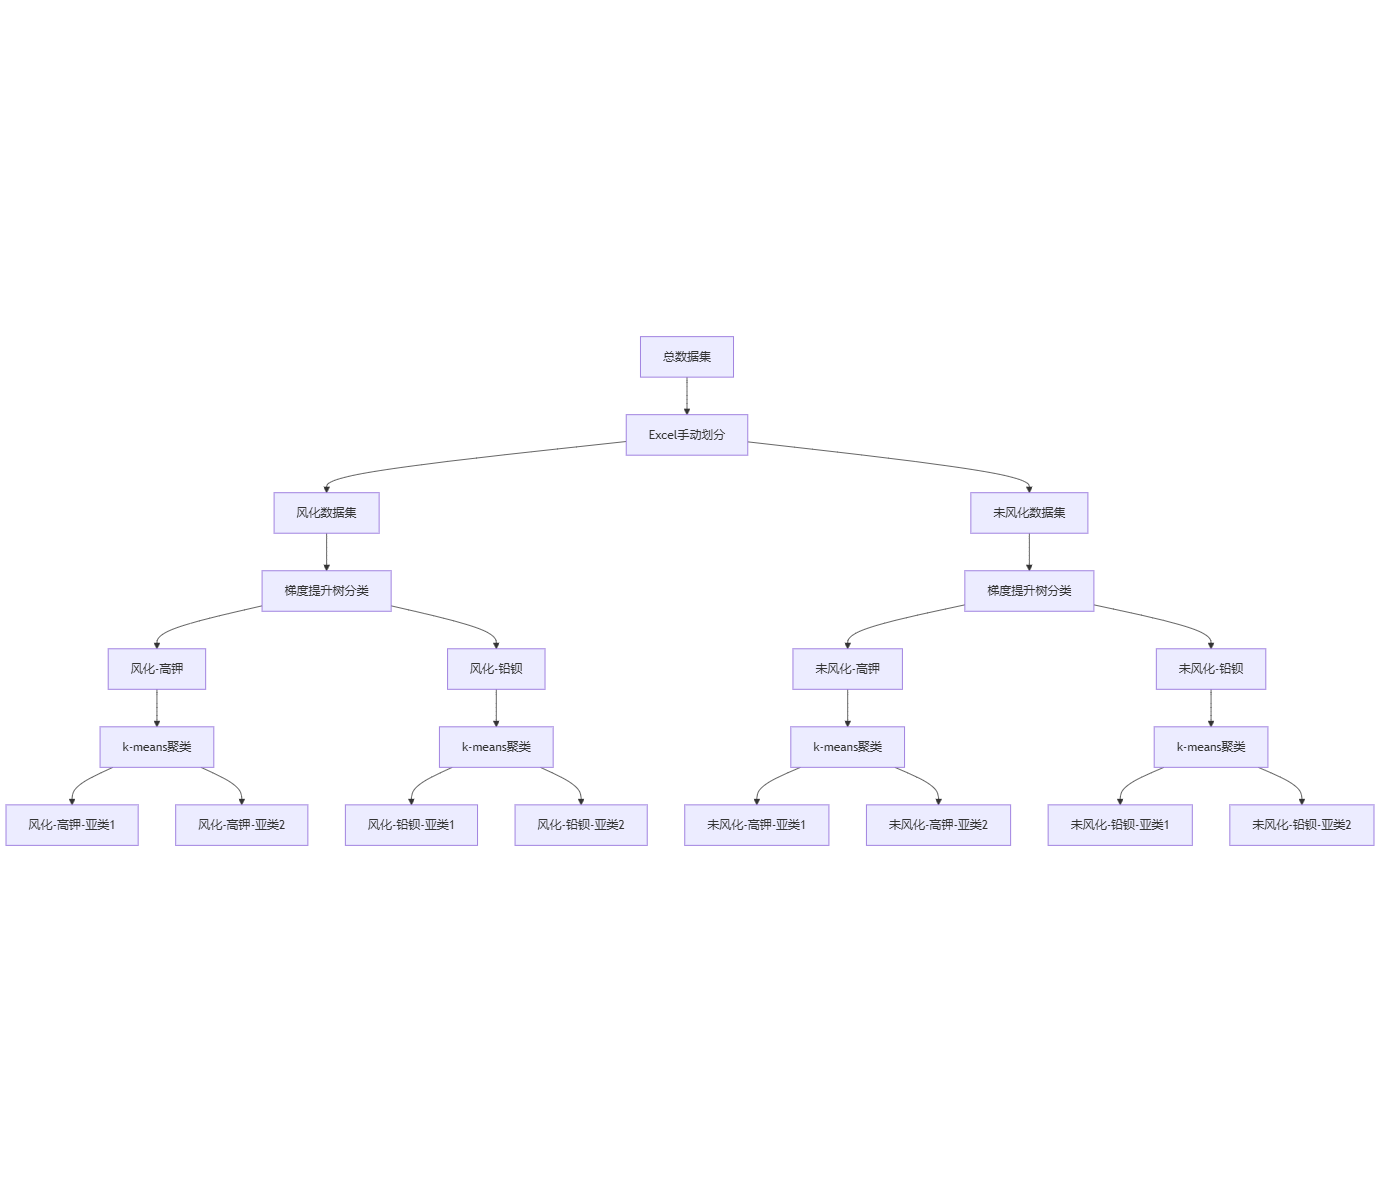

# 问题三

- 数据预处理

表单3种的数据按照风化和未风化划分 ---> 放到模型中预测

## 风化状态下的类型预测

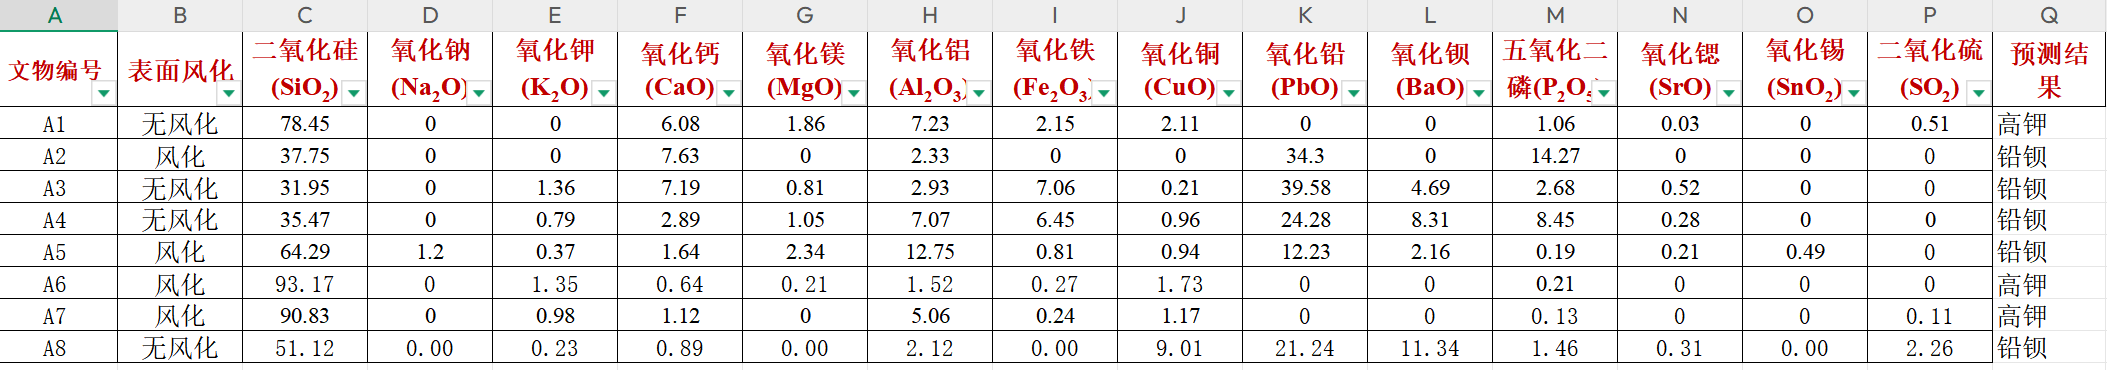

- 这里更进一步分析可以用聚类分析的模型算出亚类的归属


## 敏感性分析

通过测试不用的初始聚类数量k，观察结果的差别大小

通过设置不同的 n_estimators: int = 100 和 max_depth: int = 3 来绘制其对于最后模型准确率的影响




### 分析第二层的梯度提升树 -- 以风化的为例

In [16]:
# 数据输入
data3 = pd.read_excel('附件-处理.xlsx', sheet_name='问2-风化')
data3.head()

,文物采样点,类型,有无风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,40,铅钡,风化,16.71,0.0,0.00,1.87,0.00,0.45,0.19,0.00,70.21,6.69,1.77,0.68,0.0,0.0
1,39,铅钡,风化,26.25,0.0,0.00,1.11,0.00,0.50,0.00,0.88,61.03,7.22,1.16,0.61,0.0,0.0
2,43部位1,铅钡,风化,12.41,0.0,0.00,5.24,0.89,2.25,0.76,5.35,59.85,7.29,0.00,0.64,0.0,0.0
3,54严重风化点,铅钡,风化,17.11,0.0,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.0
4,54,铅钡,风化,22.28,0.0,0.32,3.19,1.28,4.15,0.00,0.83,55.46,7.04,4.24,0.88,0.0,0.0


In [25]:
from spsspro.algorithm import supervised_learning
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X=data3[['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'
        ]]

y = data3['类型']

# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)



In [26]:

#取消科学计数法
import  pandas as pd
import numpy as np
pd.set_option("display.float_format", lambda x: "%.2f" % x) #为了直观的显示数字，不采用科学计数法
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [28]:
model = GradientBoostingClassifier() # 梯度提升树
model.fit(X, y)

GradientBoostingClassifier()

- 模型敏感度分析

主要参数 

1. n_estimators => 基学习器数量
2. max_depth => 树的最大深度


In [39]:
%matplotlib inline
data_X=[]
data_y=[]
max_n_estimators = 1
for i in range(1,1000,20):
    model = GradientBoostingClassifier(n_estimators=i,
    max_depth=None)
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="铅钡"))
    print(i)

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501
521
541
561
581
601
621
641
661
681
701
721
741
761
781
801
821
841
861
881
901
921
941
961
981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


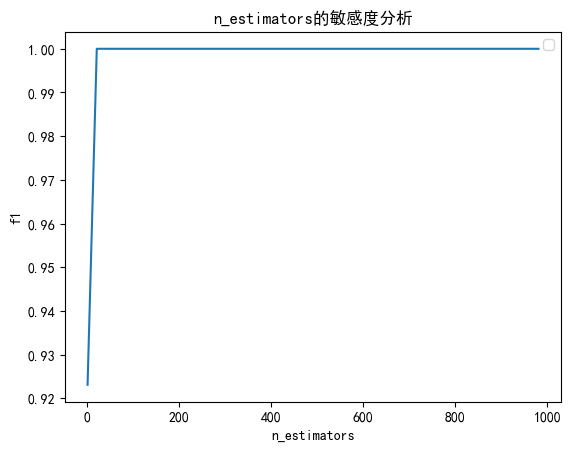

In [40]:
plt.plot(data_X,data_y)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('n_estimators的敏感度分析')
plt.legend()
plt.savefig('n_estimators的敏感度分析.jpg')
plt.show()

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


49


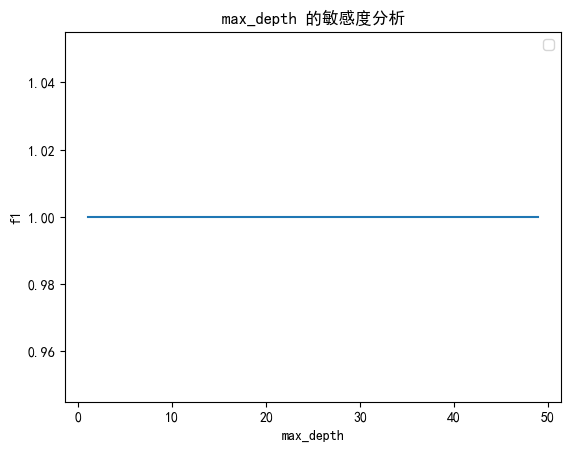

In [43]:

data_X=[]
data_y=[]
for i in range(1,50,2):
    model = GradientBoostingClassifier(n_estimators=1000,max_depth=i) # 树的最大深度
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="高钾"))
    print(i)
plt.plot(data_X,data_y)
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.title('max_depth 的敏感度分析')
plt.legend()
plt.savefig('max_depth 的敏感度分析.jpg')
plt.show()

# 问题四

: 针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系，并比较不同类别之间的化学成分关联关系的差异性。 

问题（1）：针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系

不同类别 -> 高钾/铅钡 

因为这些比变量是定量的，

在高钾玻璃文物样品中，进行Spearman相关性分析。

在铅钡玻璃文物样品中，进行 Spearman相关性分析



问题（2）：比较不同类别之间的化学成分关联关系的差异性。

与问题1的问题（2）类似
